# Pryngles Tutorials: Developers
## Part 6 - Legacy with reflection

This notebook illustrate in detail the interface of the `Pryngles` package. It is especially intended for developers.

Authors:
- Jorge I. Zuluaga, [jorge.zuluaga@udea.edu.co](mailto:jorge.zuluaga@udea.edu.co)

Warnings:
- This file was prepared using version 0.7.3.1 of `Pryngles`.
- It is still working under version 0.9.0.
- Matplotlib commands run in version 3.5.2.

<center><font color='red' size='8'><i>This tutorial is under construction.</i></font></center>

## Preparation

Before running this tutorial you need to install `Pryngles`:

In [1]:
#!python -m pip install -qU pryngles
#!pip show pryngles

If you are running this tutrial in `Google Colab` please run the following lines:

In [16]:
"""
import matplotlib.pyplot as plt
RESOLUTION = 150
%matplotlib inline
plt.rcParams['figure.dpi'] = RESOLUTION
# Sometimes you need to run twice this magic to be sure the backend is loaded
%matplotlib inline
#""";

## Import useful packages

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

Although it is not a good practice to import everything of a package, for this tutorial and to avoid excesively large names we will import everything from Pryngles:

In [2]:
from pryngles import *
from pryngles import pixx
import time

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
x = -0.4
z = 0.4
print(np.arctan2(z,x)*180/np.pi)

135.0


## Update Reflection method

This code is intended to test the updateReflection method contributed by Allard to the legacy module.

Create system:

In [4]:
sys_test = System()
s=sys_test.add(kind="Star",physics=dict(radius=Consts.rsun/sys_test.ul),optics=dict(limb_coeffs=[0.65]))
p=sys_test.add(kind="Planet", primary=s,
               orbit=dict(a=3, e=0.0),
               physics=dict(radius=Consts.rsaturn/sys_test.ul),
               optics=dict(nspangles=2000))
r=sys_test.add(kind="Ring", primary=p,
               physics=dict(fi=1.5, fe=2.25, i=30*Consts.deg,roll=90*Consts.deg),
               optics=dict(nspangles=2000))
RP_test=sys_test.ensamble_system()

Initialize orbit:

90.0


<IPython.core.display.Javascript object>


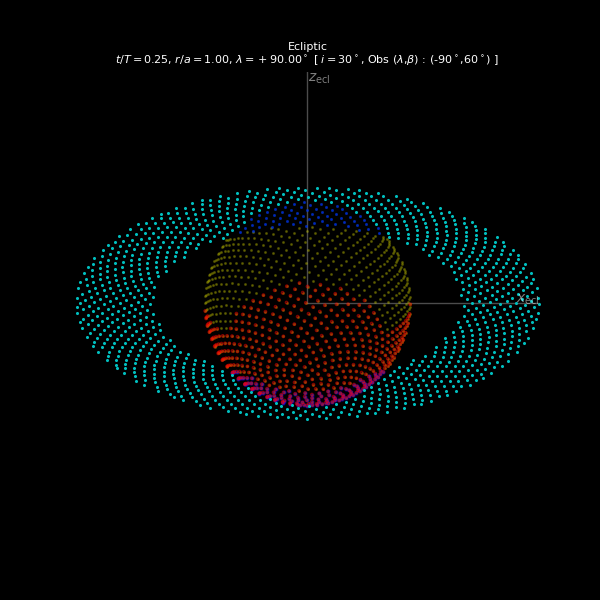

<IPython.core.display.Javascript object>


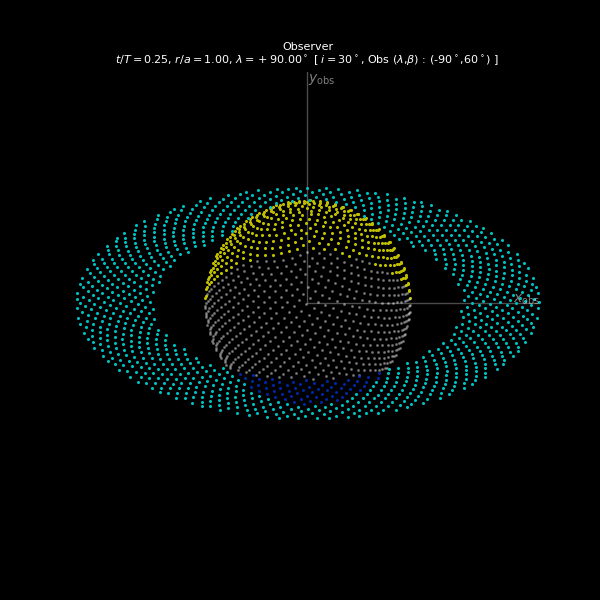

<IPython.core.display.Javascript object>


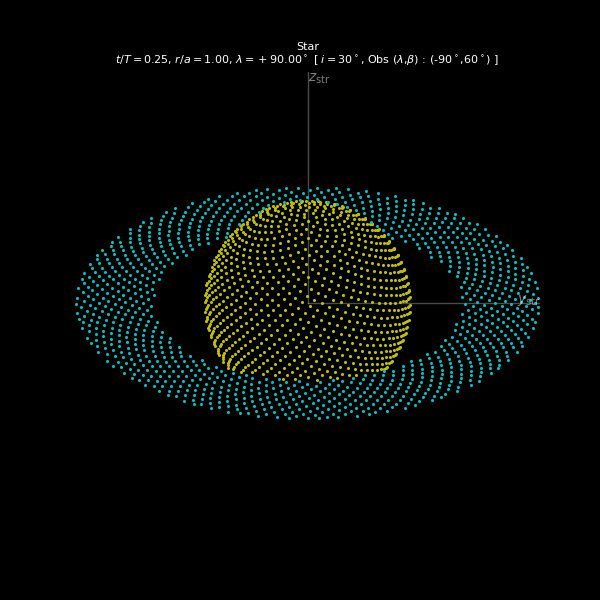

In [6]:
print(RP_test.roll*Consts.rad)
RP_test.changeObserver([-90*Consts.deg,60*Consts.deg])
RP_test.changeStellarPosition(90*Consts.deg)
RP_test.plotRingedPlanet(showstar=False)
plt.show()

# Star apparant size
thetas=RP_test.thetas

# Range of stellar longitude
lamb_initial=90*Consts.deg
lamb_final=450*Consts.deg
lambs=np.linspace(lamb_initial,lamb_final,181)

Now compute fluxes:

In [7]:
# New
Rps_test=[]
Rrs_test=[]
Pp = []
Pr = []
Ptot=[]
Qr=[]
Qp=[]
Qtot=[]
Ur=[]
Up=[]
Utot=[]
alpha=[]
ts_test=[]
Tp_test = []
Tr_test = []
T_test = []

reflec_time = []
for lamb in tqdm(lambs):
    st = time.time()
    RP_test.changeStellarPosition(lamb)
    RP_test.changeObserver([-90*Consts.deg,60*Consts.deg])
    ts_test+=[RP_test.t*RP_test.CU.UT]
    #print("True anomaly: ", lamb/Consts.deg)
    
    RP_test.updateOpticalFactors()
    et = time.time()
    #print("Time geometry takes: ", et - st)
    
    st = time.time()
    RP_test.updateReflection()
    et = time.time()
    reflec_time += [et-st]
    #print("Time reflection takes: ", et - st)
    
    Rps_test+=[RP_test.Rip.sum()]
    Rrs_test+=[RP_test.Rir.sum()]
    Pp += [RP_test.Ptotp]
    Pr += [RP_test.Ptotr]
    Ptot+=[RP_test.Ptot]
    Qr+=[RP_test.Stotr[1]]
    Qp+=[RP_test.Stotp[1]]
    Qtot+=[RP_test.Stot[1]]
    Ur+=[RP_test.Stotr[2]]
    Up+=[RP_test.Stotp[2]]
    Utot+=[RP_test.Stot[2]]
    alpha+=[np.arccos(RP_test.alphaps)*180/np.pi]
    
save_dict = RP_test.save_values

  1%|          | 1/181 [00:00<01:35,  1.88it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


  1%|          | 2/181 [00:00<01:23,  2.13it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


  2%|▏         | 3/181 [00:01<01:22,  2.16it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


  2%|▏         | 4/181 [00:01<01:25,  2.07it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


  3%|▎         | 5/181 [00:02<01:21,  2.15it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


  3%|▎         | 6/181 [00:02<01:16,  2.27it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


  4%|▍         | 7/181 [00:03<01:16,  2.27it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


  4%|▍         | 8/181 [00:03<01:16,  2.26it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


  5%|▍         | 9/181 [00:03<01:11,  2.40it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


  6%|▌         | 10/181 [00:04<01:08,  2.51it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


  6%|▌         | 11/181 [00:04<01:06,  2.57it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


  7%|▋         | 12/181 [00:05<01:03,  2.65it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


  7%|▋         | 13/181 [00:05<01:01,  2.71it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


  8%|▊         | 14/181 [00:05<01:04,  2.57it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


  8%|▊         | 15/181 [00:06<01:03,  2.63it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


  9%|▉         | 16/181 [00:06<01:03,  2.60it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


  9%|▉         | 17/181 [00:07<01:04,  2.56it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 10%|▉         | 18/181 [00:07<01:04,  2.53it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 11%|█         | 20/181 [00:08<00:59,  2.71it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865
Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 12%|█▏        | 21/181 [00:08<01:01,  2.61it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 12%|█▏        | 22/181 [00:09<01:10,  2.25it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 13%|█▎        | 23/181 [00:09<01:12,  2.19it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 13%|█▎        | 24/181 [00:09<01:09,  2.27it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 14%|█▍        | 25/181 [00:10<01:05,  2.37it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 14%|█▍        | 26/181 [00:10<01:02,  2.47it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 15%|█▌        | 28/181 [00:11<01:01,  2.50it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865
Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 16%|█▌        | 29/181 [00:11<00:58,  2.58it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 17%|█▋        | 30/181 [00:12<00:57,  2.63it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 17%|█▋        | 31/181 [00:12<00:57,  2.63it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 18%|█▊        | 32/181 [00:12<00:55,  2.66it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 18%|█▊        | 33/181 [00:13<00:54,  2.71it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 19%|█▉        | 34/181 [00:13<00:53,  2.72it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 19%|█▉        | 35/181 [00:14<00:52,  2.76it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 20%|█▉        | 36/181 [00:14<00:52,  2.74it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 20%|██        | 37/181 [00:14<00:53,  2.70it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 21%|██        | 38/181 [00:15<00:54,  2.62it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 22%|██▏       | 39/181 [00:15<00:56,  2.51it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 22%|██▏       | 40/181 [00:16<00:55,  2.56it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 23%|██▎       | 41/181 [00:16<00:56,  2.49it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 23%|██▎       | 42/181 [00:16<00:54,  2.55it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 24%|██▍       | 44/181 [00:17<01:03,  2.17it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865
Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 25%|██▍       | 45/181 [00:18<00:58,  2.31it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 26%|██▌       | 47/181 [00:18<00:54,  2.48it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865
Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 27%|██▋       | 48/181 [00:19<00:52,  2.55it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 27%|██▋       | 49/181 [00:19<00:50,  2.59it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 28%|██▊       | 51/181 [00:20<00:50,  2.57it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865
Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865
Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 29%|██▉       | 53/181 [00:21<00:50,  2.53it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 30%|██▉       | 54/181 [00:21<00:51,  2.45it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 30%|███       | 55/181 [00:22<00:48,  2.59it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 31%|███       | 56/181 [00:22<00:47,  2.61it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 31%|███▏      | 57/181 [00:22<00:47,  2.62it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 32%|███▏      | 58/181 [00:23<00:46,  2.63it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 33%|███▎      | 59/181 [00:23<00:46,  2.61it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 33%|███▎      | 60/181 [00:23<00:46,  2.62it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 34%|███▎      | 61/181 [00:24<00:49,  2.42it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 34%|███▍      | 62/181 [00:24<00:52,  2.27it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 35%|███▍      | 63/181 [00:25<00:54,  2.18it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 35%|███▌      | 64/181 [00:25<00:54,  2.15it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 36%|███▌      | 65/181 [00:26<00:51,  2.27it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865
Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 36%|███▋      | 66/181 [00:26<00:54,  2.11it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 38%|███▊      | 68/181 [00:28<01:01,  1.85it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 38%|███▊      | 69/181 [00:28<00:56,  1.97it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865
Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 39%|███▉      | 71/181 [00:29<00:52,  2.09it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 40%|███▉      | 72/181 [00:29<00:49,  2.20it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 40%|████      | 73/181 [00:30<00:47,  2.25it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 41%|████      | 74/181 [00:30<00:46,  2.29it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 41%|████▏     | 75/181 [00:31<00:44,  2.40it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 42%|████▏     | 76/181 [00:31<00:43,  2.40it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 43%|████▎     | 77/181 [00:31<00:43,  2.41it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 43%|████▎     | 78/181 [00:32<00:42,  2.40it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 44%|████▎     | 79/181 [00:32<00:41,  2.46it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 44%|████▍     | 80/181 [00:33<00:40,  2.48it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 45%|████▍     | 81/181 [00:33<00:40,  2.45it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 45%|████▌     | 82/181 [00:33<00:40,  2.44it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 46%|████▌     | 83/181 [00:34<00:40,  2.39it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 46%|████▋     | 84/181 [00:34<00:40,  2.38it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 47%|████▋     | 85/181 [00:35<00:41,  2.30it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865
Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 48%|████▊     | 87/181 [00:36<00:40,  2.29it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865
Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 49%|████▉     | 89/181 [00:37<00:45,  2.01it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 50%|████▉     | 90/181 [00:37<00:46,  1.94it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 50%|█████     | 91/181 [00:38<00:45,  1.97it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 51%|█████     | 92/181 [00:38<00:46,  1.92it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 51%|█████▏    | 93/181 [00:39<00:46,  1.91it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 52%|█████▏    | 94/181 [00:39<00:41,  2.08it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 52%|█████▏    | 95/181 [00:40<00:39,  2.18it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 53%|█████▎    | 96/181 [00:40<00:37,  2.27it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 54%|█████▍    | 98/181 [00:41<00:35,  2.33it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865
Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 55%|█████▍    | 99/181 [00:41<00:36,  2.25it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 55%|█████▌    | 100/181 [00:42<00:36,  2.23it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865
Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 56%|█████▋    | 102/181 [00:43<00:35,  2.21it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 57%|█████▋    | 103/181 [00:43<00:34,  2.28it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 57%|█████▋    | 104/181 [00:44<00:35,  2.18it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 58%|█████▊    | 105/181 [00:44<00:34,  2.23it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865
Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 59%|█████▉    | 107/181 [00:45<00:36,  2.05it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 60%|█████▉    | 108/181 [00:46<00:33,  2.20it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 60%|██████    | 109/181 [00:46<00:32,  2.21it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 61%|██████    | 110/181 [00:46<00:31,  2.26it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 61%|██████▏   | 111/181 [00:47<00:30,  2.33it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 62%|██████▏   | 112/181 [00:47<00:28,  2.41it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 62%|██████▏   | 113/181 [00:48<00:27,  2.46it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 63%|██████▎   | 114/181 [00:48<00:27,  2.45it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 64%|██████▎   | 115/181 [00:48<00:26,  2.50it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 64%|██████▍   | 116/181 [00:49<00:25,  2.55it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 65%|██████▍   | 117/181 [00:49<00:25,  2.54it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 65%|██████▌   | 118/181 [00:49<00:24,  2.58it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 66%|██████▌   | 119/181 [00:50<00:23,  2.60it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 66%|██████▋   | 120/181 [00:50<00:24,  2.54it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 67%|██████▋   | 121/181 [00:51<00:23,  2.54it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 67%|██████▋   | 122/181 [00:51<00:23,  2.46it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 68%|██████▊   | 123/181 [00:52<00:23,  2.43it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 69%|██████▊   | 124/181 [00:52<00:27,  2.10it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865
Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 69%|██████▉   | 125/181 [00:53<00:27,  2.01it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 70%|███████   | 127/181 [00:54<00:31,  1.73it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 71%|███████   | 128/181 [00:54<00:29,  1.79it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 71%|███████▏  | 129/181 [00:55<00:26,  1.98it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 72%|███████▏  | 130/181 [00:55<00:23,  2.19it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 72%|███████▏  | 131/181 [00:56<00:21,  2.37it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 73%|███████▎  | 132/181 [00:56<00:19,  2.50it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 73%|███████▎  | 133/181 [00:56<00:18,  2.60it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 74%|███████▍  | 134/181 [00:57<00:17,  2.68it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 75%|███████▍  | 135/181 [00:57<00:17,  2.66it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 75%|███████▌  | 136/181 [00:57<00:16,  2.71it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 76%|███████▌  | 137/181 [00:58<00:16,  2.67it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 76%|███████▌  | 138/181 [00:58<00:16,  2.64it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 77%|███████▋  | 139/181 [00:58<00:15,  2.65it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 77%|███████▋  | 140/181 [00:59<00:15,  2.65it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865
Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 78%|███████▊  | 142/181 [01:00<00:15,  2.45it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 79%|███████▉  | 143/181 [01:00<00:15,  2.42it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 80%|███████▉  | 144/181 [01:01<00:15,  2.32it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 80%|████████  | 145/181 [01:01<00:15,  2.32it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 81%|████████  | 146/181 [01:01<00:14,  2.39it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 81%|████████  | 147/181 [01:02<00:15,  2.19it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 82%|████████▏ | 149/181 [01:03<00:13,  2.43it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865
Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 83%|████████▎ | 151/181 [01:03<00:11,  2.60it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865
Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 84%|████████▍ | 152/181 [01:04<00:11,  2.48it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 85%|████████▍ | 153/181 [01:04<00:11,  2.53it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 85%|████████▌ | 154/181 [01:05<00:10,  2.52it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 86%|████████▌ | 155/181 [01:05<00:09,  2.61it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 86%|████████▌ | 156/181 [01:05<00:09,  2.70it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 87%|████████▋ | 157/181 [01:06<00:08,  2.70it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 87%|████████▋ | 158/181 [01:06<00:08,  2.75it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 88%|████████▊ | 159/181 [01:06<00:07,  2.76it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 88%|████████▊ | 160/181 [01:07<00:07,  2.75it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 89%|████████▉ | 161/181 [01:07<00:07,  2.74it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 90%|████████▉ | 162/181 [01:08<00:06,  2.79it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 90%|█████████ | 163/181 [01:08<00:06,  2.82it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 91%|█████████ | 164/181 [01:08<00:05,  2.87it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 91%|█████████ | 165/181 [01:09<00:05,  2.85it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 92%|█████████▏| 166/181 [01:09<00:05,  2.84it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 92%|█████████▏| 167/181 [01:09<00:05,  2.79it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 93%|█████████▎| 168/181 [01:10<00:04,  2.80it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 93%|█████████▎| 169/181 [01:10<00:04,  2.69it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 94%|█████████▍| 170/181 [01:11<00:04,  2.40it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 94%|█████████▍| 171/181 [01:11<00:04,  2.26it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 96%|█████████▌| 173/181 [01:12<00:03,  2.24it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865
Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 96%|█████████▌| 174/181 [01:12<00:03,  2.13it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 97%|█████████▋| 175/181 [01:13<00:02,  2.00it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 97%|█████████▋| 176/181 [01:14<00:02,  2.00it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 98%|█████████▊| 177/181 [01:14<00:01,  2.20it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 98%|█████████▊| 178/181 [01:14<00:01,  2.22it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 99%|█████████▉| 179/181 [01:15<00:00,  2.43it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


 99%|█████████▉| 180/181 [01:15<00:00,  2.61it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


100%|██████████| 181/181 [01:15<00:00,  2.39it/s]

Max/min y, in obs:  0.499640736527639 -0.49986410959274075
Max/min x, in obs:  0.4999524093494876 -0.49962675674607865


Compute statistics:

In [9]:
# New
ts_test=np.array(ts_test)
Rps_test=np.array(Rps_test)
Rrs_test=np.array(Rrs_test)
Pp=np.array(Pp)
Pr=np.array(Pr)
Ptot=np.array(Ptot)
Qr=np.array(Qr)
Qp=np.array(Qp)
Qtot=np.array(Qtot)
Ur=np.array(Ur)
Up=np.array(Up)
Utot=np.array(Utot)
alpha=np.array(alpha)
Tp_test = np.array(Tp_test)
Tr_test = np.array(Tr_test)
T_test = np.array(T_test)

ind = np.argmax(alpha)
indstart = np.argsort(alpha)[0]

reflec_time = np.array(reflec_time)
print("Average reflection time: ", np.mean(reflec_time))

ts_test=(ts_test-ts_test[0])/Consts.day

print("Phase angle: ", alpha, "Normal vector ring: ", RP_test.nr_obs)
with open("./tmp/reflection-test.pkl", "wb") as f:
    pickle.dump(save_dict, f)

Average reflection time:  0.14991641571508588
Phase angle:  [120.         119.97985077 119.91945209 119.81895061 119.6785891
 119.49870423 119.27972332 119.02216045 118.7266118  118.39375044
 118.02432067 117.61913201 117.17905285 116.70500416 116.19795301
 115.65890627 115.08890446 114.48901582 113.86033071 113.20395639
 112.52101212 111.81262478 111.07992485 110.3240429  109.54610643
 108.74723725 107.9285492  107.09114627 106.23612117 105.36455415
 104.47751219 103.57604851 102.66120232 101.73399879 100.79544933
  99.84655194  98.88829182  97.92164213  96.94756484  95.96701169
  94.98092532  93.9902404   92.99588485  91.99878116  90.99984768
  90.          89.00015232  88.00121884  87.00411515  86.0097596
  85.01907468  84.03298831  83.05243516  82.07835787  81.11170818
  80.15344806  79.20455067  78.26600121  77.33879768  76.42395149
  75.52248781  74.63544585  73.76387883  72.90885373  72.0714508
  71.25276275  70.45389357  69.6759571   68.92007515  68.18737522
  67.47898788  66.7

Check saved data

In [15]:
print(np.arccos(-0.1)*180/np.pi,np.arccos(0.1)*180/np.pi)

95.7391704772668 84.26082952273322


In [13]:
aPQU_dict = {"Alpha": alpha, "P_planet": Pp, "P_ring": Pr, "P_tot": Ptot,
             "Q_planet": Qp, "Q_ring": Qr, "Q_tot": Qtot,
             "U_planet": Up, "U_ring": Ur, "Utot": Utot}
xyzp_dict = {"x_planet": RP_test.rps_obs[:,0],"y_planet": RP_test.rps_obs[:,1],"z_planet": RP_test.rps_obs[:,2]}
xyzr_dict = {"x_ring": RP_test.rrs_obs[:,0],"y_ring": RP_test.rrs_obs[:,1],"z_ring": RP_test.rrs_obs[:,2]}
aPQU_df = pd.DataFrame.from_dict(aPQU_dict)
xyzp_df = pd.DataFrame.from_dict(xyzp_dict)
xyzr_df = pd.DataFrame.from_dict(xyzr_dict)

aPQU_df.to_csv("./tmp/aPQU.csv")
xyzp_df.to_csv("./tmp/xyzp.csv")
xyzr_df.to_csv("./tmp/xyzr.csv")

In [58]:
with open("./tmp/reflection-test.pkl","rb") as f:
    save_file = pickle.load(f)

betap_matrix = dict()
j=0
for i,save in enumerate(save_file):
    
    if save["obj"] == "planet":
        betap_matrix[f"{j*2} degrees"] = save['args'][2]
        j += 1
        
print(np.mean(betap_matrix["2 degrees"]*180/np.pi),betap_matrix["2 degrees"]*180/np.pi)

87.40027185591624 [  2.54519824   3.84713147 172.86361313   7.89432485   5.22125878
  11.95069837 168.65060569   9.26386727 169.22842748   6.70961522
  13.29822382 164.41929925 169.69360211  10.75173983  17.35420993
 164.9766401   14.76917255 160.16152208 165.38833558  12.40406768
  18.79266208 160.701884   165.63575332  16.40887098  22.84880459
 161.06373144  14.27392376  20.40602355 156.39385712  26.95950812
 161.22716447  18.26939108  24.4228837  156.70602302  16.42378708
 161.16394281  22.24587218 152.04255561  28.48160703 156.78545896
  20.41201991 160.83549698  26.23203123 152.30071935  18.92828364
  32.59861867 156.60187755  24.37319682 147.63810551  30.25077507
 152.29091822  22.91009128 156.11401039  28.33785313 147.83216577
  21.87701651  34.31896044 151.98058878  26.86152463 143.17019461
 155.26723553  32.33020686 147.72103855  25.8521127   38.44690772
 151.32558474  30.81562326 143.28251621  25.37692579 153.99080645
  36.36814925 147.26915315  29.80067724 138.62683447  42.6

Plot of the scattered light:

<IPython.core.display.Javascript object>


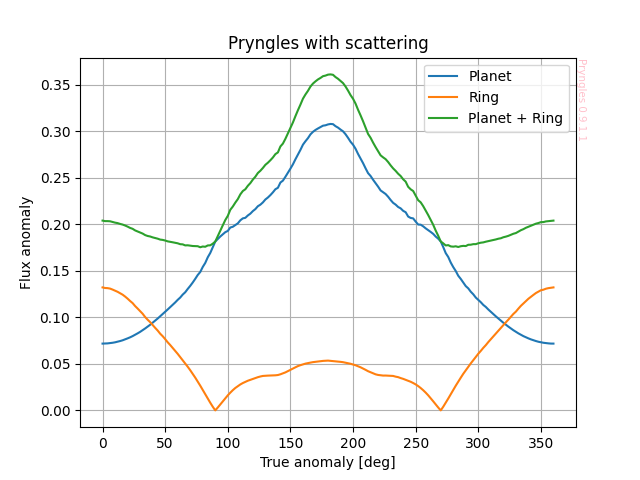

In [7]:
#Plot
fig=plt.figure()
ax=fig.gca()
ax.plot(lambs*180/np.pi-90,Rps_test,label="Planet")
ax.plot(lambs*180/np.pi-90,Rrs_test,label="Ring")
ax.plot(lambs*180/np.pi-90,Rps_test+Rrs_test,label="Planet + Ring")
ax.set_xlabel("True anomaly [deg]")
ax.set_ylabel("Flux anomaly")
ax.set_title("Pryngles with scattering")
ax.legend();
Plot.pryngles_mark(ax)
ax.grid()

Degree of polarization:

<IPython.core.display.Javascript object>


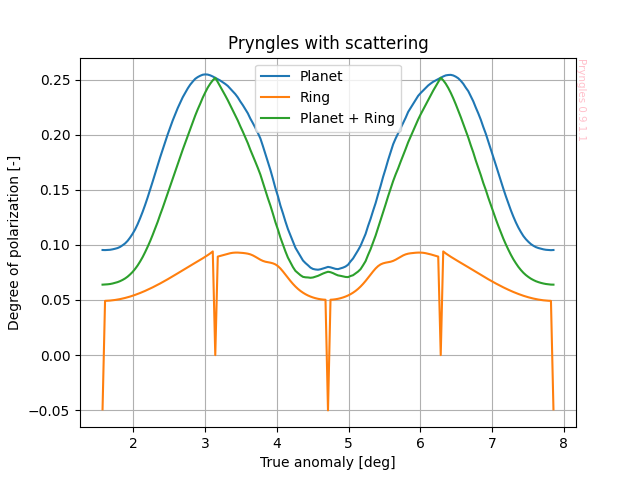

In [12]:
fig=plt.figure()
ax=fig.gca()
ax.plot(lambs,Pp,label="Planet")
ax.plot(lambs,Pr,label="Ring")
ax.plot(lambs,Ptot,label="Planet + Ring")
ax.set_xlabel("True anomaly [deg]")
ax.set_ylabel("Degree of polarization [-]")
ax.set_title("Pryngles with scattering")
ax.legend();
ax.grid()
Plot.pryngles_mark(ax)
plt.show()

Components of the Stokes vector:

<IPython.core.display.Javascript object>


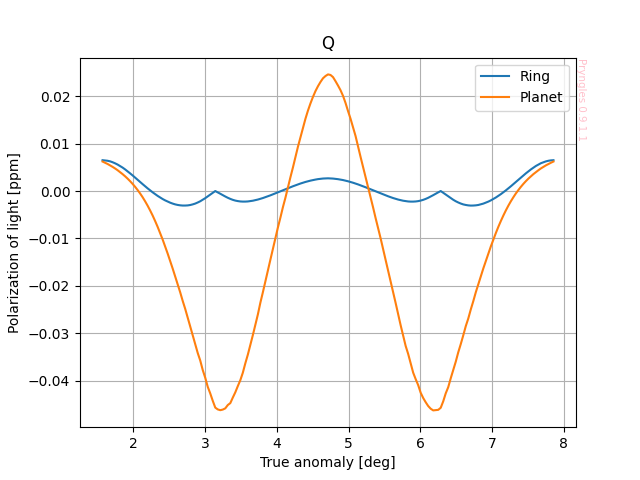

In [13]:
fig=plt.figure()
ax=fig.gca()
ax.plot(lambs,Qr,label="Ring")
ax.plot(lambs,Qp,label="Planet")
ax.set_xlabel("True anomaly [deg]")
ax.set_ylabel("Polarization of light [ppm]")
ax.set_title("Q")
ax.legend();
ax.grid()
Plot.pryngles_mark(ax)
plt.show()

<IPython.core.display.Javascript object>


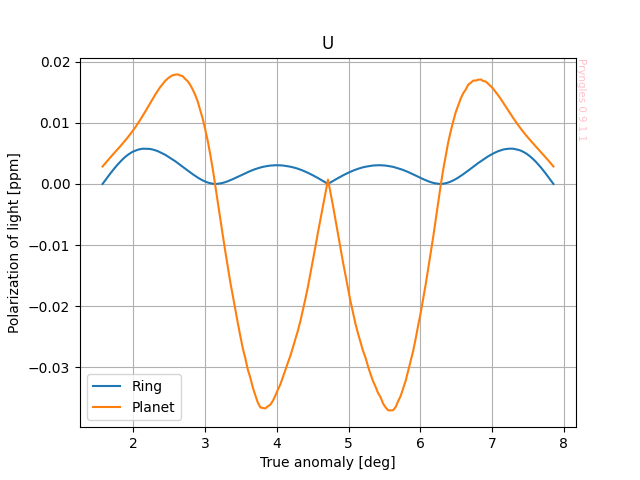

In [14]:
fig=plt.figure()
ax=fig.gca()
ax.plot(lambs,Ur,label="Ring")
ax.plot(lambs,Up,label="Planet")
ax.set_xlabel("True anomaly [deg]")
ax.set_ylabel("Polarization of light [ppm]")
ax.set_title("U")
ax.legend();
ax.grid()
Plot.pryngles_mark(ax)
plt.show()

<IPython.core.display.Javascript object>


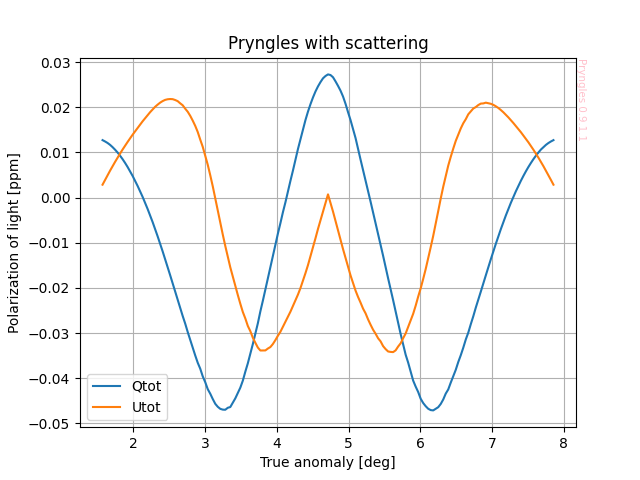

In [15]:
fig=plt.figure()
ax=fig.gca()
ax.plot(lambs,Qtot,label="Qtot")
ax.plot(lambs,Utot,label="Utot")
ax.set_xlabel("True anomaly [deg]")
ax.set_ylabel("Polarization of light [ppm]")
ax.set_title("Pryngles with scattering")
ax.legend();
ax.grid()
Plot.pryngles_mark(ax)
plt.show()

--- 
*The authors*, Last update: november, 2022.